# FPS별 폴더 생성
입력값이 frame images가 들어있는 폴더 명이기 때문에 각각 따로 만들어 줘야함.  
이를 변경하고 싶다면 sapiens 모델 코드 자체를 뜯어고쳐야 하는 번거러움이 존재.  

사용하는 이미지는 resolution test를 진행했을 때 사용했던 600장의 images.  
resolution test 결과 화질에 따른 속도 차이는 크게 존재하지 않았기 때문에 720p로 실험 진행

In [6]:
import os, shutil
from tqdm import tqdm

input_dir   = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_720p_20sec"
output_root = "../data/test_patient_image/fps_test"
basename    = "M04_VISIT6_상지_720p_20sec"
fps_steps   = {30:1, 15:2, 10:3}

frames = sorted([f for f in os.listdir(input_dir) if f.lower().endswith(".jpg")])
print(f"총 {len(frames)} 프레임")

for fps, step in fps_steps.items():
    out_dir = os.path.join(output_root, f"{basename}_{fps}fps")
    shutil.rmtree(out_dir, ignore_errors=True)
    os.makedirs(out_dir)
    for i, idx in enumerate(tqdm(range(0, len(frames), step), desc=f"{fps}fps")):
        src = os.path.join(input_dir, frames[idx])
        dst = os.path.join(out_dir, f"{i+1:05d}.jpg")
        shutil.copy2(src, dst)
    print(f"{fps}fps → {i+1}장 저장 완료: {out_dir}")


총 599 프레임


30fps: 100% 599/599 [00:03<00:00, 197.23it/s]


30fps → 599장 저장 완료: ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_30fps


15fps: 100% 300/300 [00:01<00:00, 220.73it/s]


15fps → 300장 저장 완료: ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_15fps


10fps: 100% 200/200 [00:00<00:00, 217.05it/s]

10fps → 200장 저장 완료: ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps


# sapiens 모델 돌리기
## 30fps

In [8]:
import subprocess, time

INPUT  = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_30fps"
OUTPUT = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_30fps_json"

t0 = time.time()
subprocess.run([
    "bash",
    "../sapiens/pose/scripts/demo/local/keypoints17.sh",
    INPUT,
    OUTPUT
], check=True)
dt = time.time() - t0

print(f"30fps 실행 완료: {dt:.2f}초 소요")

../sapiens/pose/scripts/demo/local/keypoints17.sh: line 3: fg: no job control


Distributing 599 image paths into 1 jobs.


/opt/conda/lib/python3.10/site-packages/mmengine/utils/package_utils.py:48: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/conda/lib/python3.10/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/sapiens_0.3b/sapiens_0.3b_coco_best_coco_AP_796.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: head.deconv_layers.1.weight, head.deconv_layers.1.bias, head.deconv_layers.1.running_mean, head.deconv_layers.1.running_var, head.deconv_layers.4.weight, head.deconv_layers.4.bias, head.deconv_layers.4.running_mean, head.deconv_layers.4.running_var, head.conv_layers.1.weight, head.conv_layers.1.bias, head.conv_layers.1.running_mean, head.conv_layers.1.running_var, head.conv_layers.4.weight, head.conv_layers.4.bias, head.conv_layers.4.running_mean, head.conv_layers.4.running_var



100%|██████████| 599/599 [20:51<00:00,  2.09s/it]


Processing complete.
Results saved to ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_30fps_json/sapiens_0.3b
30fps 실행 완료: 1267.84초 소요


../sapiens/pose/scripts/demo/local/keypoints17.sh: line 96: cd: OLDPWD not set


## 15fps

In [9]:
import subprocess, time

INPUT  = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_15fps"
OUTPUT = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_15fps_json"

t0 = time.time()
subprocess.run([
    "bash",
    "../sapiens/pose/scripts/demo/local/keypoints17.sh",
    INPUT,
    OUTPUT
], check=True)
dt = time.time() - t0

print(f"15fps 실행 완료: {dt:.2f}초 소요")

../sapiens/pose/scripts/demo/local/keypoints17.sh: line 3: fg: no job control


Distributing 300 image paths into 1 jobs.


/opt/conda/lib/python3.10/site-packages/mmengine/utils/package_utils.py:48: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/conda/lib/python3.10/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/sapiens_0.3b/sapiens_0.3b_coco_best_coco_AP_796.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: head.deconv_layers.1.weight, head.deconv_layers.1.bias, head.deconv_layers.1.running_mean, head.deconv_layers.1.running_var, head.deconv_layers.4.weight, head.deconv_layers.4.bias, head.deconv_layers.4.running_mean, head.deconv_layers.4.running_var, head.conv_layers.1.weight, head.conv_layers.1.bias, head.conv_layers.1.running_mean, head.conv_layers.1.running_var, head.conv_layers.4.weight, head.conv_layers.4.bias, head.conv_layers.4.running_mean, head.conv_layers.4.running_var



100%|██████████| 300/300 [10:10<00:00,  2.03s/it]


Processing complete.
Results saved to ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_15fps_json/sapiens_0.3b
30fps 실행 완료: 623.26초 소요


../sapiens/pose/scripts/demo/local/keypoints17.sh: line 96: cd: OLDPWD not set


## 10fps

In [10]:
import subprocess, time

INPUT  = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps"
OUTPUT = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps_json"

t0 = time.time()
subprocess.run([
    "bash",
    "../sapiens/pose/scripts/demo/local/keypoints17.sh",
    INPUT,
    OUTPUT
], check=True)
dt = time.time() - t0

print(f"10fps 실행 완료: {dt:.2f}초 소요")

../sapiens/pose/scripts/demo/local/keypoints17.sh: line 3: fg: no job control


Distributing 200 image paths into 1 jobs.


/opt/conda/lib/python3.10/site-packages/mmengine/utils/package_utils.py:48: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
/opt/conda/lib/python3.10/importlib/__init__.py:169: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  _bootstrap._exec(spec, module)


Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth
Loads checkpoint by local backend from path: /workspace/nas203/ds_RehabilitationMedicineData/IDs/Kimjihoo/3_project_HCCmove/sapiens/pose/checkpoints/sapiens_0.3b/sapiens_0.3b_coco_best_coco_AP_796.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: head.deconv_layers.1.weight, head.deconv_layers.1.bias, head.deconv_layers.1.running_mean, head.deconv_layers.1.running_var, head.deconv_layers.4.weight, head.deconv_layers.4.bias, head.deconv_layers.4.running_mean, head.deconv_layers.4.running_var, head.conv_layers.1.weight, head.conv_layers.1.bias, head.conv_layers.1.running_mean, head.conv_layers.1.running_var, head.conv_layers.4.weight, head.conv_layers.4.bias, head.conv_layers.4.running_mean, head.conv_layers.4.running_var



100%|██████████| 200/200 [06:48<00:00,  2.04s/it]


Processing complete.
30fps 실행 완료: 418.86초 소요


../sapiens/pose/scripts/demo/local/keypoints17.sh: line 96: cd: OLDPWD not set


Results saved to ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps_json/sapiens_0.3b


## 각 fps 별 sapiens 모델이 잘 추측 했는지 확인  
확인을 위해서 json dir만 설정해주면 됨.

JPG 300개, JSON 300개


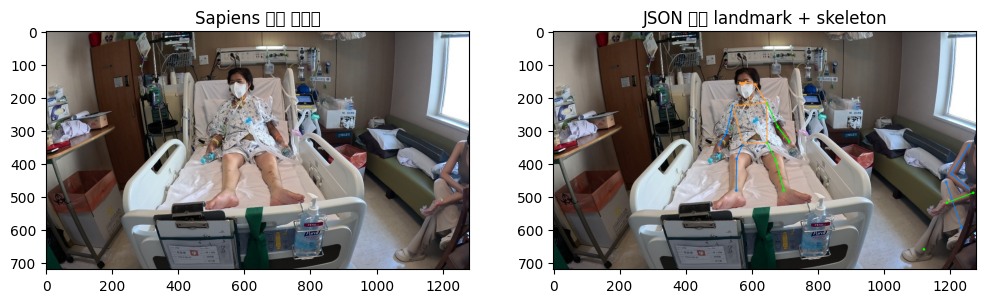

In [20]:
import os, cv2, json
from glob import glob
import matplotlib.pyplot as plt

# ===== 설정 =====
JSON_DIR = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_15fps_json/sapiens_0.3b"

# 파일 리스트
jpgs = sorted([f for f in glob(os.path.join(JSON_DIR, "*.jpg"))])
jsons = sorted([f for f in glob(os.path.join(JSON_DIR, "*.json"))])

print(f"JPG {len(jpgs)}개, JSON {len(jsons)}개")

# ===== 시각화 함수 =====
def draw_landmarks_and_skeleton(img, instances, meta, radius=4):
    keypoint_colors = meta["keypoint_colors"]["__ndarray__"]
    skeleton_links = meta["skeleton_links"]
    skeleton_colors = meta["skeleton_link_colors"]["__ndarray__"]

    for inst in instances:
        kpts = inst.get("keypoints", [])
        scores = inst.get("keypoint_scores", [])
        if not kpts or not scores:
            continue

        # keypoints
        for idx, ((x, y), s) in enumerate(zip(kpts, scores)):
            if s > 0.05:
                color = tuple(int(c) for c in keypoint_colors[idx])
                cv2.circle(img, (int(x), int(y)), radius, color, -1)

        # skeleton
        for link_id, (i, j) in enumerate(skeleton_links):
            if i < len(kpts) and j < len(kpts):
                xi, yi = kpts[i]
                xj, yj = kpts[j]
                si, sj = scores[i], scores[j]
                if si > 0.05 and sj > 0.05:
                    color = tuple(int(c) for c in skeleton_colors[link_id])
                    cv2.line(img, (int(xi), int(yi)), (int(xj), int(yj)), color, 2)
    return img

# ===== 예시 하나 불러오기 =====
idx = 133 # 확인할 프레임 인덱스
img_path = jpgs[idx]
json_path = jsons[idx]

# 원본 이미지
img_orig = cv2.imread(img_path)

# JSON 불러오기
with open(json_path, "r") as f:
    data = json.load(f)

meta = data["meta_info"]
instances = data["instance_info"]

# landmark + skeleton 다시 그리기
img_draw = img_orig.copy()
img_draw = draw_landmarks_and_skeleton(img_draw, instances, meta)

# ===== matplotlib 시각화 =====
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title("Sapiens 저장 이미지")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
plt.title("JSON 기반 landmark + skeleton")
plt.show()


In [21]:
## upscaling을 통해 landmark 확인

원본: 3840x2160, JSON기준: 1280x720, scale=(3.00, 3.00)


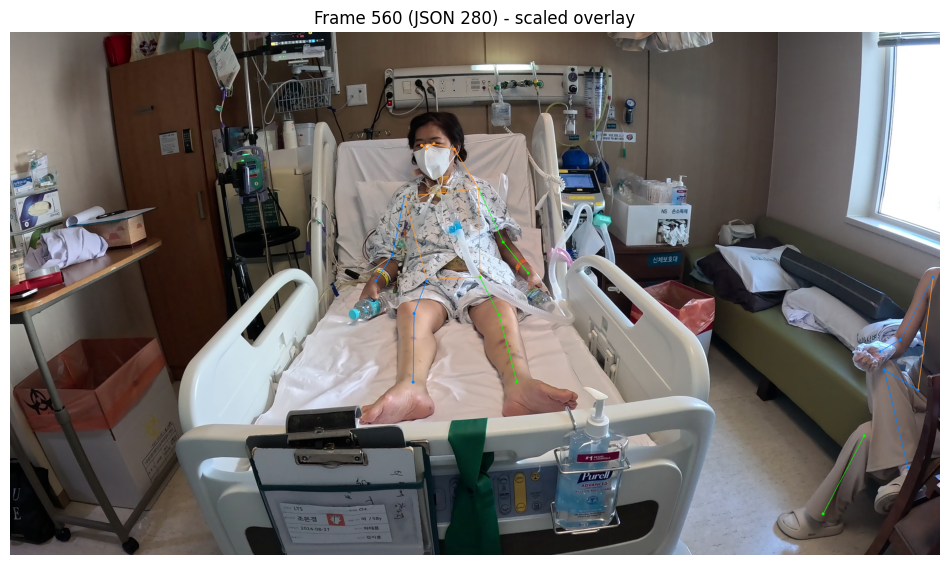

In [26]:
import os, cv2, json
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

# ===== 경로 설정 =====
ORIG_DIR = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_original_20sec"
JSON_DIR = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_15fps_json/sapiens_0.3b"


orig_frames = sorted(glob(os.path.join(ORIG_DIR, "*.jpg")))
json_files  = sorted(glob(os.path.join(JSON_DIR, "*.json")))

# 해상도 가져오기
orig_h, orig_w = cv2.imread(orig_frames[0]).shape[:2]
json_h, json_w = cv2.imread(glob(os.path.join(JSON_DIR, "*.jpg"))[0]).shape[:2]
scale_x = orig_w / json_w
scale_y = orig_h / json_h
print(f"원본: {orig_w}x{orig_h}, JSON기준: {json_w}x{json_h}, scale=({scale_x:.2f}, {scale_y:.2f})")

def draw_scaled(img, instances, meta, radius=6):
    keypoint_colors = meta["keypoint_colors"]["__ndarray__"]
    skeleton_links = meta["skeleton_links"]
    skeleton_colors = meta["skeleton_link_colors"]["__ndarray__"]

    for inst in instances:
        kpts = inst["keypoints"]
        scores = inst["keypoint_scores"]

        # keypoints
        for idx, ((x, y), s) in enumerate(zip(kpts, scores)):
            if s > 0.05:
                color = tuple(int(c) for c in keypoint_colors[idx])
                cv2.circle(img,
                           (int(x*scale_x), int(y*scale_y)),
                           radius, color, -1)

        # skeleton
        for link_id, (i, j) in enumerate(skeleton_links):
            if i < len(kpts) and j < len(kpts):
                xi, yi = kpts[i]
                xj, yj = kpts[j]
                si, sj = scores[i], scores[j]
                if si > 0.05 and sj > 0.05:
                    color = tuple(int(c) for c in skeleton_colors[link_id])
                    cv2.line(img,
                             (int(xi*scale_x), int(yi*scale_y)),
                             (int(xj*scale_x), int(yj*scale_y)),
                             color, 2)
    return img

# 테스트용 프레임
frame_idx = 560
json_idx = min(frame_idx * len(json_files) // len(orig_frames), len(json_files)-1)

with open(json_files[json_idx], "r") as f:
    data = json.load(f)

img = cv2.imread(orig_frames[frame_idx])
img_draw = draw_scaled(img.copy(), data["instance_info"], data["meta_info"])

plt.figure(figsize=(12,7))
plt.imshow(cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB))
plt.title(f"Frame {frame_idx} (JSON {json_idx}) - scaled overlay")
plt.axis("off")
plt.show()

## 이미지 저장

In [36]:
import os, cv2, json
from glob import glob
from tqdm import tqdm

# ===== 경로 설정 =====
ORIG_DIR = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_original_20sec"
JSON_BASE = "../data/test_patient_image/fps_test"
BASENAME = "M04_VISIT6_상지_720p_20sec"

# 실행할 FPS (30, 15, 10 중 하나 선택)
fps = 15

# 원본 프레임
orig_frames = sorted(glob(os.path.join(ORIG_DIR, "*.jpg")))
TOTAL_FRAMES = len(orig_frames)
print(f"원본 프레임 {TOTAL_FRAMES}장")

# JSON 경로
json_dir = os.path.join(JSON_BASE, f"{BASENAME}_{fps}fps_json", "sapiens_0.3b")
json_files = sorted(glob(os.path.join(json_dir, "*.json")))
if not json_files:
    raise RuntimeError(f"✗ JSON 없음: {json_dir}")

print(f"JSON {len(json_files)}개")

# 해상도 스케일 계산
test_img = cv2.imread(glob(os.path.join(json_dir, "*.jpg"))[0])
json_h, json_w = test_img.shape[:2]
orig_h, orig_w = cv2.imread(orig_frames[0]).shape[:2]
scale_x, scale_y = orig_w / json_w, orig_h / json_h
print(f"원본 {orig_w}x{orig_h}, JSON기준 {json_w}x{json_h}, scale=({scale_x:.2f},{scale_y:.2f})")

# ===== 함수 정의 =====
def draw_scaled(img, instances, meta, scale_x, scale_y, radius=6):
    keypoint_colors = meta["keypoint_colors"]["__ndarray__"]
    skeleton_links = meta["skeleton_links"]
    skeleton_colors = meta["skeleton_link_colors"]["__ndarray__"]

    for inst in instances:
        kpts = inst["keypoints"]
        scores = inst["keypoint_scores"]

        # keypoints
        for idx, ((x, y), s) in enumerate(zip(kpts, scores)):
            if s > 0.05:
                color = tuple(int(c) for c in keypoint_colors[idx])
                cv2.circle(img,
                           (int(x*scale_x), int(y*scale_y)),
                           radius, color, -1)

        # skeleton
        for link_id, (i, j) in enumerate(skeleton_links):
            if i < len(kpts) and j < len(kpts):
                xi, yi = kpts[i]
                xj, yj = kpts[j]
                si, sj = scores[i], scores[j]
                if si > 0.05 and sj > 0.05:
                    color = tuple(int(c) for c in skeleton_colors[link_id])
                    cv2.line(img,
                             (int(xi*scale_x), int(yi*scale_y)),
                             (int(xj*scale_x), int(yj*scale_y)),
                             color, 2)
    return img

# 출력 폴더
out_dir = os.path.join(JSON_BASE, f"{BASENAME}_{fps}fps_overlay_upscaled")
os.makedirs(out_dir, exist_ok=True)

# ===== 처리 루프 =====
for i in tqdm(range(TOTAL_FRAMES), desc=f"{fps}fps overlay"):
    # 비율 기반 매핑
    json_idx = round(i * (len(json_files)-1) / (TOTAL_FRAMES-1))
    with open(json_files[json_idx], "r") as f:
        data = json.load(f)

    img = cv2.imread(orig_frames[i])
    img_draw = draw_scaled(img, data["instance_info"], data["meta_info"], scale_x, scale_y)

    out_path = os.path.join(out_dir, os.path.basename(orig_frames[i]))
    cv2.imwrite(out_path, img_draw)

print(f"→ {fps}fps overlay 저장 완료: {out_dir}")


원본 프레임 599장
JSON 300개
원본 3840x2160, JSON기준 1280x720, scale=(3.00,3.00)


15fps overlay: 100% 599/599 [02:54<00:00,  3.44it/s]

→ 15fps overlay 저장 완료: ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_15fps_overlay_upscaled


In [38]:
import os, cv2, json
from glob import glob
from tqdm import tqdm

# ===== 경로 설정 =====
ORIG_DIR = "../data/test_patient_image/resolution_test/M04_VISIT6_상지_original_20sec"
JSON_BASE = "../data/test_patient_image/fps_test"
BASENAME = "M04_VISIT6_상지_720p_20sec"

# 실행할 FPS (30, 15, 10 중 하나 선택)
fps = 10

# 원본 프레임
orig_frames = sorted(glob(os.path.join(ORIG_DIR, "*.jpg")))
TOTAL_FRAMES = len(orig_frames)
print(f"원본 프레임 {TOTAL_FRAMES}장")

# JSON 경로
json_dir = os.path.join(JSON_BASE, f"{BASENAME}_{fps}fps_json", "sapiens_0.3b")
json_files = sorted(glob(os.path.join(json_dir, "*.json")))
if not json_files:
    raise RuntimeError(f"✗ JSON 없음: {json_dir}")

print(f"JSON {len(json_files)}개")

# 해상도 스케일 계산
test_img = cv2.imread(glob(os.path.join(json_dir, "*.jpg"))[0])
json_h, json_w = test_img.shape[:2]
orig_h, orig_w = cv2.imread(orig_frames[0]).shape[:2]
scale_x, scale_y = orig_w / json_w, orig_h / json_h
print(f"원본 {orig_w}x{orig_h}, JSON기준 {json_w}x{json_h}, scale=({scale_x:.2f},{scale_y:.2f})")

# ===== 함수 정의 =====
def draw_scaled(img, instances, meta, scale_x, scale_y, radius=6):
    keypoint_colors = meta["keypoint_colors"]["__ndarray__"]
    skeleton_links = meta["skeleton_links"]
    skeleton_colors = meta["skeleton_link_colors"]["__ndarray__"]

    for inst in instances:
        kpts = inst["keypoints"]
        scores = inst["keypoint_scores"]

        # keypoints
        for idx, ((x, y), s) in enumerate(zip(kpts, scores)):
            if s > 0.05:
                color = tuple(int(c) for c in keypoint_colors[idx])
                cv2.circle(img,
                           (int(x*scale_x), int(y*scale_y)),
                           radius, color, -1)

        # skeleton
        for link_id, (i, j) in enumerate(skeleton_links):
            if i < len(kpts) and j < len(kpts):
                xi, yi = kpts[i]
                xj, yj = kpts[j]
                si, sj = scores[i], scores[j]
                if si > 0.05 and sj > 0.05:
                    color = tuple(int(c) for c in skeleton_colors[link_id])
                    cv2.line(img,
                             (int(xi*scale_x), int(yi*scale_y)),
                             (int(xj*scale_x), int(yj*scale_y)),
                             color, 2)
    return img

# 출력 폴더
out_dir = os.path.join(JSON_BASE, f"{BASENAME}_{fps}fps_overlay_upscaled")
os.makedirs(out_dir, exist_ok=True)

# ===== 처리 루프 =====
for i in tqdm(range(TOTAL_FRAMES), desc=f"{fps}fps overlay"):
    # 비율 기반 매핑
    json_idx = round(i * (len(json_files)-1) / (TOTAL_FRAMES-1))
    with open(json_files[json_idx], "r") as f:
        data = json.load(f)

    img = cv2.imread(orig_frames[i])
    img_draw = draw_scaled(img, data["instance_info"], data["meta_info"], scale_x, scale_y)

    out_path = os.path.join(out_dir, os.path.basename(orig_frames[i]))
    cv2.imwrite(out_path, img_draw)

print(f"→ {fps}fps overlay 저장 완료: {out_dir}")


원본 프레임 599장
JSON 200개
원본 3840x2160, JSON기준 1280x720, scale=(3.00,3.00)


10fps overlay: 100% 599/599 [03:18<00:00,  3.02it/s]

→ 10fps overlay 저장 완료: ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps_overlay_upscaled


# 영상 생성

In [39]:
import cv2, os
from glob import glob
from tqdm import tqdm

# ===== 설정 =====
FRAME_DIR = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps_overlay_upscaled"  # 프레임 폴더
OUTPUT    = "../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps_overlay.mp4"
FPS       = 30  # 최종 영상 fps

# ===== 프레임 리스트 =====
frames = sorted(glob(os.path.join(FRAME_DIR, "*.jpg")))
if not frames:
    raise RuntimeError(f"프레임 없음: {FRAME_DIR}")

# 첫 프레임으로 해상도 확인
sample = cv2.imread(frames[0])
h, w = sample.shape[:2]
print(f"프레임 {len(frames)}장, 해상도 {w}x{h}, fps={FPS}")

# ===== VideoWriter 초기화 =====
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # mp4 코덱
out = cv2.VideoWriter(OUTPUT, fourcc, FPS, (w, h))

# ===== 프레임 쓰기 =====
for f in tqdm(frames, desc="영상 생성"):
    img = cv2.imread(f)
    out.write(img)

out.release()
print(f"완료: {OUTPUT}")


프레임 599장, 해상도 3840x2160, fps=30


영상 생성: 100% 599/599 [01:39<00:00,  6.02it/s]


완료: ../data/test_patient_image/fps_test/M04_VISIT6_상지_720p_20sec_10fps_overlay.mp4
